<a href="https://colab.research.google.com/github/E-wave112/ml_proj1/blob/master/umojahackclassic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                  ID  target
0      ID_3B4D2Q2DSI       0
1      ID_7MPWFJ9XFI       1
2      ID_5VVT3Q3M5B       0
3      ID_C2GTVS1H7K       2
4      ID_0YGC8V3PFT       0
...              ...     ...
76786  ID_TDGNIM7K6C       1
76787  ID_YN3FUZ9TGO       2
76788  ID_VDI8L0SWNS       1
76789  ID_7L22AF1T6K       1
76790  ID_LMMA33Q7YL       0

[76791 rows x 2 columns]


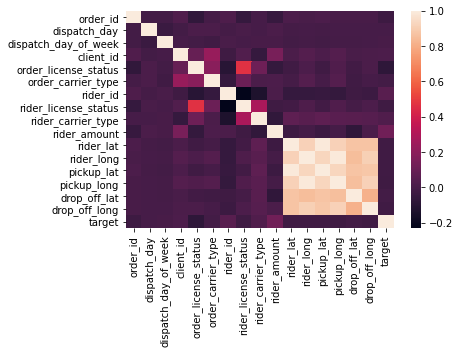

In [ ]:
##xgb
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report,recall_score,precision_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

df = pd.read_csv('/content/drive/MyDrive/zindi/sendy_d_s/UHSendy/Train.csv')
df2 = pd.read_csv('/content/drive/MyDrive/zindi/sendy_d_s/UHSendy/Test.csv')

label_enc = LabelEncoder()
std_scale = StandardScaler()

df['dispatch_time'] = label_enc.fit_transform(df['dispatch_time'])
df['client_type'].replace('Business',50,inplace=True)
df['client_type'].replace('Personal',40,inplace=True)
df['vendor_type'].replace('Bike',30,inplace=True)

# df = pd.get_dummies(df, drop_first=True)


df.drop(['ID','order_id','dispatch_day','dispatch_day_of_week','rider_amount','rider_id',],axis=1,inplace=True)

corre = df.corr()
sns.heatmap(corre)


X = df.drop(['target'],axis=1)
y = df['target']

std_scale = MinMaxScaler()

X = std_scale.fit_transform(X)
X = np.array(X)
y = np.array(y)


df2.drop(['ID','order_id','dispatch_day','dispatch_day_of_week','rider_amount','rider_id',],axis=1,inplace=True)
df2['client_type'].replace('Business',3,inplace=True)
df2['client_type'].replace('Personal',2,inplace=True)
df2['vendor_type'].replace('Bike',1,inplace=True)
df2['dispatch_time'] = label_enc.fit_transform(df2['dispatch_time'])

# df2 = pd.get_dummies(df2, drop_first=True)

test = std_scale.fit_transform(df2)

rnd_clf = RandomForestClassifier(min_samples_leaf=1, n_estimators =400,min_samples_split=4,max_leaf_nodes = 10,
                            max_features= 'auto',max_depth=9,criterion = 'gini',
            bootstrap=True,oob_score=True, n_jobs=-1,random_state=2,class_weight='balanced')


xg_clf = xgb.XGBClassifier(max_depth=9,learning_rate=0.1,n_estimators = 200,importance_type='total_gain',colsample_bytree=0.3,
                           scoring='accuracy',objective='multi:softmax',random_state=1)

# cat_clf = CatBoostClassifier(learning_rate=0.05,n_estimators=500,max_depth=12,
#                              random_state=1,custom_metric='Accuracy',
#                              boosting_type='Ordered',l2_leaf_reg=8,early_stopping_rounds=100,bootstrap_type = 'Bayesian')

lgb_clf = lgb.LGBMClassifier(extra_trees=True,boost='dart',path_smooth =2,num_leaves = 70,num_iterations= 200, min_samples_leaf= 300, min_gain_to_split=4, max_depth=10, max_bins =200,
                             learning_rate = 0.1, lambda_li = 5, lambda_l2 = 4, early_stoppping_round= 40, bagging_freq= 4, bagging_fraction= 0.7)
xg_clf.fit(X,y)
predictions = xg_clf.predict(test)

submit_file = pd.read_csv('/content/drive/MyDrive/zindi/sendy_d_s/UHSendy/SampleSubmission.csv')
submit_file['target'] = predictions
submit_file.to_csv('/content/drive/MyDrive/zindi/sendy_d_s/UHSendy/third.csv',index=False)
print(submit_file)

                  ID  target
0      ID_3B4D2Q2DSI       2
1      ID_7MPWFJ9XFI       0
2      ID_5VVT3Q3M5B       2
3      ID_C2GTVS1H7K       2
4      ID_0YGC8V3PFT       2
...              ...     ...
76786  ID_TDGNIM7K6C       2
76787  ID_YN3FUZ9TGO       2
76788  ID_VDI8L0SWNS       1
76789  ID_7L22AF1T6K       2
76790  ID_LMMA33Q7YL       2

[76791 rows x 2 columns]


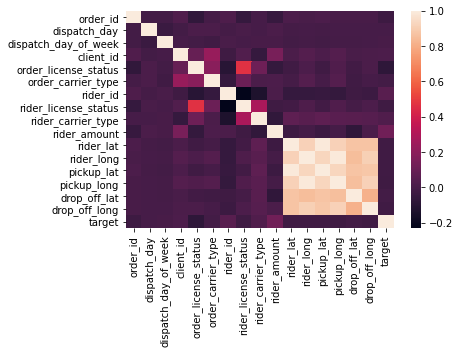

In [ ]:
##logit
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report,recall_score,precision_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('/content/drive/MyDrive/zindi/sendy_d_s/UHSendy/Train.csv')
df2 = pd.read_csv('/content/drive/MyDrive/zindi/sendy_d_s/UHSendy/Test.csv')


label_enc = LabelEncoder()
std_scale = StandardScaler()
corre = df.corr()
sns.heatmap(corre)

df['dispatch_time'] = label_enc.fit_transform(df['dispatch_time'])
df['client_type'].replace('Business',50,inplace=True)
df['client_type'].replace('Personal',40,inplace=True)
df['vendor_type'].replace('Bike',30,inplace=True)

# df = pd.get_dummies(df, drop_first=True)


df.drop(['ID','order_id','dispatch_day','dispatch_day_of_week','rider_amount','rider_id',],axis=1,inplace=True)

X = df.drop(['target'],axis=1)
y = df['target']

std_scale = StandardScaler()

X = std_scale.fit_transform(X)
X = np.array(X)
y = np.array(y)


df2.drop(['ID','order_id','dispatch_day','dispatch_day_of_week','rider_amount','rider_id',],axis=1,inplace=True)
df2['client_type'].replace('Business',3,inplace=True)
df2['client_type'].replace('Personal',2,inplace=True)
df2['vendor_type'].replace('Bike',1,inplace=True)
df2['dispatch_time'] = label_enc.fit_transform(df2['dispatch_time'])

# df2 = pd.get_dummies(df2, drop_first=True)

test = std_scale.fit_transform(df2)

log_clf = LogisticRegression(fit_intercept=True,tol= 1e-06, solver = 'saga', penalty = 'l2', 
    multi_class = 'ovr',max_iter = 400, dual =False, C = 0.1,intercept_scaling=1,class_weight='balanced', random_state=1,n_jobs=-1)



log_clf.fit(X,y)
predictions = log_clf.predict(test)

submit_file = pd.read_csv('/content/drive/MyDrive/zindi/sendy_d_s/UHSendy/SampleSubmission.csv')
submit_file['target'] = predictions
submit_file.to_csv('/content/drive/MyDrive/zindi/sendy_d_s/UHSendy/fifth.csv',index=False)
print(submit_file)

# submit_file = pd.read_csv('/content/drive/My Drive/zindi/zindisamplesubmission.csv')
# submit_file['default_status'] = predictions
# submit_file.to_csv('/content/drive/My Drive/zindi/submissionstack.csv',index=False)
# print(submit_file)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


                  ID  target
0      ID_3B4D2Q2DSI       0
1      ID_7MPWFJ9XFI       0
2      ID_5VVT3Q3M5B       0
3      ID_C2GTVS1H7K       0
4      ID_0YGC8V3PFT       0
...              ...     ...
76786  ID_TDGNIM7K6C       0
76787  ID_YN3FUZ9TGO       0
76788  ID_VDI8L0SWNS       0
76789  ID_7L22AF1T6K       0
76790  ID_LMMA33Q7YL       0

[76791 rows x 2 columns]


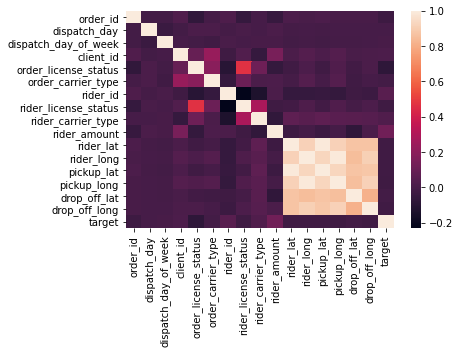

In [ ]:
##lgbm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report,recall_score,precision_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

df = pd.read_csv('/content/drive/MyDrive/zindi/sendy_d_s/UHSendy/Train.csv')
df2 = pd.read_csv('/content/drive/MyDrive/zindi/sendy_d_s/UHSendy/Test.csv')

label_enc = LabelEncoder()
std_scale = StandardScaler()

df['dispatch_time'] = label_enc.fit_transform(df['dispatch_time'])
df['client_type'].replace('Business',50,inplace=True)
df['client_type'].replace('Personal',40,inplace=True)
df['vendor_type'].replace('Bike',30,inplace=True)

# df = pd.get_dummies(df, drop_first=True)


df.drop(['ID','order_id','dispatch_day','dispatch_day_of_week','rider_amount','rider_id',],axis=1,inplace=True)

corre = df.corr()
sns.heatmap(corre)


X = df.drop(['target'],axis=1)
y = df['target']

std_scale = StandardScaler()

X = std_scale.fit_transform(X)
X = np.array(X)
y = np.array(y)


df2.drop(['ID','order_id','dispatch_day','dispatch_day_of_week','rider_amount','rider_id',],axis=1,inplace=True)
df2['client_type'].replace('Business',3,inplace=True)
df2['client_type'].replace('Personal',2,inplace=True)
df2['vendor_type'].replace('Bike',1,inplace=True)
df2['dispatch_time'] = label_enc.fit_transform(df2['dispatch_time'])

# df2 = pd.get_dummies(df2, drop_first=True)

test = std_scale.fit_transform(df2)

rnd_clf = RandomForestClassifier(min_samples_leaf=1, n_estimators =400,min_samples_split=4,max_leaf_nodes = 10,
                            max_features= 'auto',max_depth=9,criterion = 'gini',
            bootstrap=True,oob_score=True, n_jobs=-1,random_state=2,class_weight='balanced')


xg_clf = xgb.XGBClassifier(max_depth=9,learning_rate=0.1,n_estimators = 200,importance_type='total_gain',colsample_bytree=0.3,
                           scoring='accuracy',objective='multi:softmax',random_state=1)

# cat_clf = CatBoostClassifier(learning_rate=0.05,n_estimators=500,max_depth=12,
#                              random_state=1,custom_metric='Accuracy',
#                              boosting_type='Ordered',l2_leaf_reg=8,early_stopping_rounds=100,bootstrap_type = 'Bayesian')

lgb_clf = lgb.LGBMClassifier(extra_trees=True,boost='dart',path_smooth =2,num_leaves = 70,num_iterations= 200, min_samples_leaf= 300, min_gain_to_split=4, max_depth=910, max_bins =400,
                             learning_rate = 0.1, lambda_li = 5, lambda_l2 = 4, early_stoppping_round= 40, bagging_freq= 4, bagging_fraction= 0.7)
lgb_clf.fit(X,y)
predictions = lgb_clf.predict(test)

submit_file = pd.read_csv('/content/drive/MyDrive/zindi/sendy_d_s/UHSendy/SampleSubmission.csv')
submit_file['target'] = predictions
submit_file.to_csv('/content/drive/MyDrive/zindi/sendy_d_s/UHSendy/fourth.csv',index=False)
print(submit_file)

                  ID  target
0      ID_3B4D2Q2DSI       0
1      ID_7MPWFJ9XFI       0
2      ID_5VVT3Q3M5B       0
3      ID_C2GTVS1H7K       0
4      ID_0YGC8V3PFT       0
...              ...     ...
76786  ID_TDGNIM7K6C       0
76787  ID_YN3FUZ9TGO       0
76788  ID_VDI8L0SWNS       0
76789  ID_7L22AF1T6K       0
76790  ID_LMMA33Q7YL       0

[76791 rows x 2 columns]


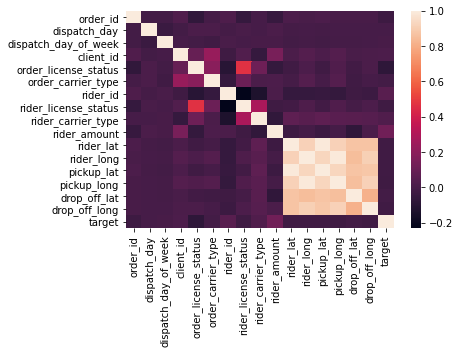

In [ ]:
##highest
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report,recall_score,precision_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier,BaggingClassifier,RandomForestClassifier,AdaBoostClassifier

df = pd.read_csv('/content/drive/MyDrive/zindi/sendy_d_s/UHSendy/Train.csv')
df2 = pd.read_csv('/content/drive/MyDrive/zindi/sendy_d_s/UHSendy/Test.csv')

label_enc = LabelEncoder()
std_scale = StandardScaler()


df['dispatch_time'] = label_enc.fit_transform(df['dispatch_time'])
df['client_type'].replace('Business',50,inplace=True)
df['client_type'].replace('Personal',40,inplace=True)
df['vendor_type'].replace('Bike',30,inplace=True)

# df = pd.get_dummies(df, drop_first=True)


df.drop(['ID','order_id','dispatch_day','dispatch_day_of_week','rider_amount','rider_id',],axis=1,inplace=True)

corre = df.corr()
sns.heatmap(corre)


X = df.drop(['target'],axis=1)
y = df['target']

std_scale = StandardScaler()

X = std_scale.fit_transform(X)
X = np.array(X)
y = np.array(y)


df2.drop(['ID','order_id','dispatch_day','dispatch_day_of_week','rider_amount','rider_id',],axis=1,inplace=True)
df2['client_type'].replace('Business',3,inplace=True)
df2['client_type'].replace('Personal',2,inplace=True)
df2['vendor_type'].replace('Bike',1,inplace=True)
df2['dispatch_time'] = label_enc.fit_transform(df2['dispatch_time'])

# df2 = pd.get_dummies(df2, drop_first=True)

test = std_scale.fit_transform(df2)

gbm_clf = GradientBoostingClassifier(subsample=1.0,n_estimators =100,
          max_features = 'sqrt', max_depth = 6, loss ='deviance', learning_rate = 0.1,criterion='friedman_mse',random_state=1,validation_fraction=0.1)
gbm_clf.fit(X,y)
predictions = gbm_clf.predict(test)

submit_file = pd.read_csv('/content/drive/MyDrive/zindi/sendy_d_s/UHSendy/SampleSubmission.csv')
submit_file['target'] = predictions
submit_file.to_csv('/content/drive/MyDrive/zindi/sendy_d_s/UHSendy/sixth.csv',index=False)
print(submit_file)
